In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import fetch_20newsgroups

In [2]:
data = fetch_20newsgroups()
categories = data.target_names
df = pd.DataFrame(data=data.data)
df['target'] = data.target

In [3]:
df['text'] = df[0]
df = df.drop(0, axis=1)

In [4]:
# train = fetch_20newsgroups(subset='train', categories=categories)
# train = fetch_20newsgroups(subset='test', categories=categories)
x = df['text']
y = df['target']

In [4]:
import nltk
from nltk.corpus import stopwords
stopwords = set(stopwords.words('english'))

In [29]:
# nltk.download('punkt')

In [7]:
df.head()

,target,text
0,7,From: lerxst@wam.umd.edu (where's my thing)\nS...
1,4,From: guykuo@carson.u.washington.edu (Guy Kuo)...
2,4,From: twillis@ec.ecn.purdue.edu (Thomas E Will...
3,1,From: jgreen@amber (Joe Green)\nSubject: Re: W...
4,14,From: jcm@head-cfa.harvard.edu (Jonathan McDow...


In [39]:
import re
clean_text = []
# def preprocess_data(text):
for i in range(1, len(df)):
#     text = text.split().replace('\n', '')
    text = re.sub(r"[^a-zA-Z]", " ", df['text'][i])
    text = text.lower()
    tokens = text.split()
#     tokens = nltk.word_tokenize(text)
    tokens = ' '.join(tokens)
    clean_text.append(tokens)
#     tokens = [token for token in tokens if token not in stopwords]
#     return tokens

In [30]:
clean_text

['from guykuo carson u washington edu guy kuo subject si clock poll final call summary final call for si clock reports keywords si acceleration clock upgrade article i d shelley qvfo innc s organization university of washington lines nntp posting host carson u washington edu a fair number of brave souls who upgraded their si clock oscillator have shared their experiences for this poll please send a brief message detailing your experiences with the procedure top speed attained cpu rated speed add on cards and adapters heat sinks hour of usage per day floppy disk functionality with and m floppies are especially requested i will be summarizing in the next two days so please add to the network knowledge base if you have done the clock upgrade and haven t answered this poll thanks guy kuo guykuo u washington edu',
 'from twillis ec ecn purdue edu thomas e willis subject pb questions organization purdue university engineering computer network distribution usa lines well folks my mac plus fin

In [40]:
text = str(df['text'])
texts = 'hello how are you iam \n sunil love to do coding\n'
df['preprocessed'] = df['text'].apply(lambda x: (str(x)))

AttributeError: 'list' object has no attribute 'apply'

In [32]:
# X = clean_text
y = data.target

In [18]:
# from sklearn.model_selection import train_test_split
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=24)

In [42]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.pipeline import make_pipeline
from sklearn.naive_bayes import MultinomialNB
cv = CountVectorizer()
X = cv.fit_transform(clean_text)
y = data.target

In [44]:
model = make_pipeline(CountVectorizer(), MultinomialNB())
model.fit(X, y)
labels = model.predict(X_test)

AttributeError: lower not found

In [47]:
labels[:5]

array([12, 15,  1, 15, 13])

In [54]:
y_test[:5]

array([12, 15,  1, 15, 13])

In [59]:
from sklearn.metrics import accuracy_score
print(accuracy_score(y_test, labels))

0.8320813079982324


<Axes: >

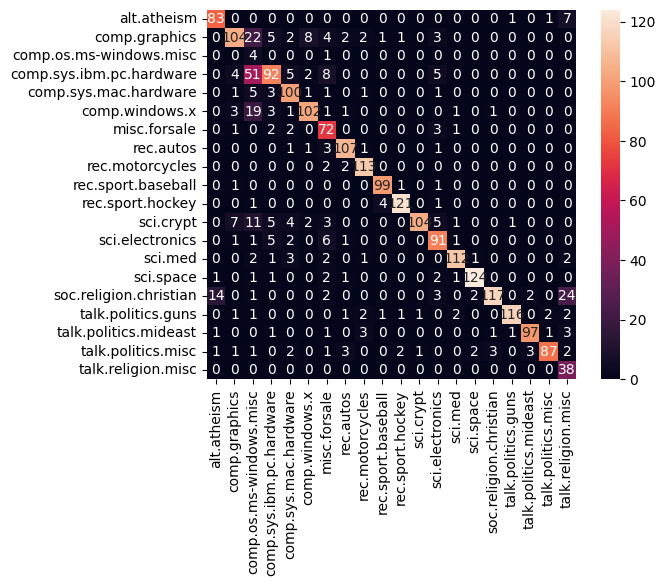

In [56]:
from sklearn.metrics import confusion_matrix
mat = confusion_matrix(y_test, labels) 
sns.heatmap(mat.T, square=True, annot=True, fmt='d', cbar='False', xticklabels=data.target_names, yticklabels=data.target_names)

In [57]:
def predict_names(s, model=model, train=data):
    pred = model.predict([s])
    return data.target_names[pred[0]]

In [58]:
predict_names("Jesus Christ")

'soc.religion.christian'

In [60]:
predict_names("thing is nice BMW car")

'rec.autos'